# IDENTIFIER STATISTICS

1. [Median, min, max](#gen-stats)
2. [Number of identifiers per record (graph)](#identifiers-per-record) 
3.  [Number of records per identifier type (e.g. DOI) (table)](#records-per-identifier) 
4. [DOI statistics](#doi-stats)

In [1]:
import os

SHARE_FILE = os.path.join('..', '..', 'data', 'share-jan-2019.json')

In [30]:
import json
from collections import defaultdict

identifiers_per_record = []
identifiers = {} #dict of dicts

identifier_occurrences = defaultdict(int)
identifier_records = defaultdict(int)

with open(SHARE_FILE, 'r') as f:
    for line in f:
        data = json.loads(line)
        
        identifiers_per_record.append(len(data['identifiers']))
        
        if len(data['identifiers']) != len(set(data['identifiers'])):
            print('Duplicate identifiers found for record: {}'.format(data['id']))
            
        record_identifiers = set()
        for identifier in data['identifiers']:
            if identifier.startswith('http://'):
                identifier = identifier.replace('http://', '')

            identifier = identifier.split('/', 1)[0]
            
            if identifier not in identifiers:
                identifiers[identifier] = { 'Records' : 0, 'Occurrences' : 0 }
            identifiers[identifier]['Occurrences'] += 1

            identifier_occurrences[identifier] += 1
            record_identifiers.add(identifier)

        for identifier in record_identifiers:
            identifiers[identifier]['Records'] += 1
            identifier_records[identifier] += 1

## <a id='gen-stats'>GENERAL STATISTICS</a>

In [16]:
import statistics
print('TYPES OF IDENTIFIERS: {}'.format(len(identifier_records.keys())))
print('MEDIAN NUMBER OF IDENTIFIERS PER RECORD: {}'.format(statistics.median(identifiers_per_record)))
print('MIN NUMBER OF IDENTIFIERS PER RECORD: {}'.format(min(identifiers_per_record)))
print('MAX NUMBER OF IDENTIFIERS PER RECORD: {}'.format(max(identifiers_per_record)))

TYPES OF IDENTIFIERS: 3930
MEDIAN NUMBER OF IDENTIFIERS PER RECORD: 2
MIN NUMBER OF IDENTIFIERS PER RECORD: 1
MAX NUMBER OF IDENTIFIERS PER RECORD: 50


## <a id='identifiers-per-record'>IDENTIFIERS PER RECORD</a>

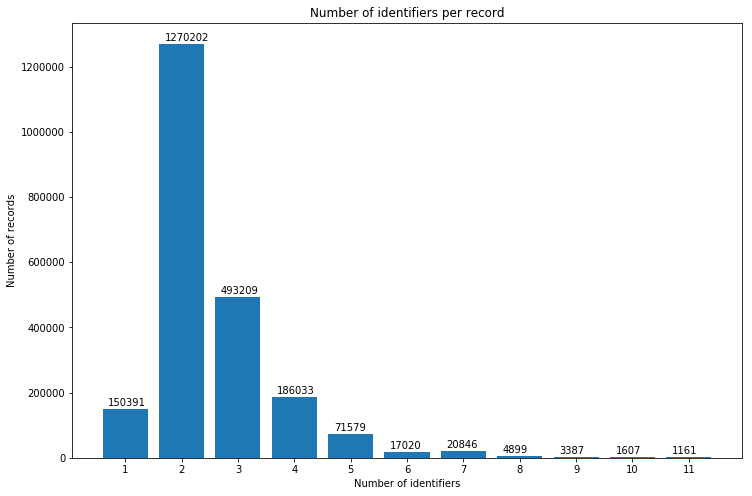

In [17]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

freq, counts = np.unique(np.array(identifiers_per_record), return_counts = True)
num_ticks = 11

plt.figure(figsize=(12,8))
plt.title('Number of identifiers per record')
plt.xlabel('Number of identifiers')
plt.ylabel('Number of records')

plt.bar(range(num_ticks), counts[:num_ticks])
plt.xticks(range(num_ticks), freq[:num_ticks])

for i, v in enumerate(counts[:num_ticks]):
    plt.text(range(num_ticks)[i] - 0.3, v + 10000, str(v))

plt.show()

## <a id='records-per-identifier'>RECORDS PER IDENTIFIER</a>

In [33]:
OUTPUT_FILE = os.path.join('..', '..', 'data_exploration_results', 'identifiers.csv')

In [36]:
import pandas as pd
df = pd.DataFrame(identifiers)
df = df.transpose().sort_values(['Records'], ascending = False)
df.to_csv(OUTPUT_FILE)

display(df[:30])

,Occurrences,Records
oai:,2254844,2131183
arxiv.org,1327541,1325030
dx.doi.org,744729,726054
link.aps.org,145534,144841
urn:,99237,78484
purl.umn.edu,62149,62133
hal.archives-ouvertes.fr,114825,48976
mpra.ub.uni-muenchen.de,38890,35169
www.econstor.eu,29637,29634
cds.cern.ch,28939,28929


## <a id='doi-stats'>DOI STATISTICS</a>

In [38]:
doi_prefixes = ['http://dx.doi.org/', 'http://doi.org/']

In [41]:
import os, json, re
from collections import defaultdict

# number of records with DOIS (those with identifiers that start with DOI prefixes above)
records_with_dois = 0

# number of records with possible DOIs (those with 10.NNNN somewhere in the identifier string)
records_with_possible_dois = 0

# number of records with more than 1 distinct DOI
records_with_multiple_dois = 0

with open(SHARE_FILE, 'r') as f:
    for line in f:
        data = json.loads(line)
        
        # extract all DOI identifiers for each record (based on DOI prefixes above)
        record_dois = set()
        for identifier in data['identifiers']:
            for doi_prefix in doi_prefixes:
                if identifier.startswith(doi_prefix):
                    record_dois.add(identifier.replace(doi_prefix, ''))
                    break

        # if record has no DOI identifier, check if there is a possible DOI: 10.NNNN
        if len(record_dois) == 0:
            for identifier in data['identifiers']:
                if re.match('(.*)[=:/]10\.[0-9]{4}(.*)', identifier):
                    records_with_possible_dois += 1
                    break
        
        if len(record_dois) > 0:
            records_with_dois += 1
            
            if len(record_dois) > 1:
                records_with_multiple_dois += 1

In [46]:
import statistics
print('RECORDS WITH DOI IDENTIFIERS: {}'.format(records_with_dois))
print('RECORDS WITH MULTIPLE DISTINCT DOI IDENTIFIERS: {}'.format(records_with_multiple_dois))
print('RECORDS WITH POSSIBLE DOI IDENTIFIERS: {}'.format(records_with_possible_dois))

RECORDS WITH DOI IDENTIFIERS: 726054
RECORDS WITH MULTIPLE DISTINCT DOI IDENTIFIERS: 17039
RECORDS WITH POSSIBLE DOI IDENTIFIERS: 519


In [ ]:
other_doi_prefixes = [
    'http://link.springer.com/openurl/pdf?id=doi:',
    'http://link.springer.com/openurl/fulltext?id=doi:',
    'http://www.tandfonline.com/doi/full/',
    'http://www.tandfonline.com/doi/abs/',
    'http://tandfonline.com/doi/full/',
    'http://amstat.tandfonline.com/doi/abs/',
    'http://amstat.tandfonline.com/doi/full/',
    'http://aip.scitation.org/doi/am-pdf/',
    'http://online.liebertpub.com/doi/full-xml/',
    'http://onlinelibrary.wiley.com/doi/',
    'http://onlinelibrary.wiley.com/wol1/doi/',
    'http://onlinelibrary.wiley.com/enhanced/doi/',
    'http://aip.scitation.org/doi/pdf/',
    'http://www.emeraldinsight.com/doi/full-xml/',
    'http://www.worldscientific.com/doi/',
    'http://ps.psychiatryonline.org/doi/full/',
    'http://www.journalofforensiceconomics.com/doi/pdf/',
    'http://www.journalofforensiceconomics.com/doi/abs/',
    'http://ajph.aphapublications.org/doi/full/',
    'http://ajph.aphapublications.org/doi/abs/',
    'http://www.futuremedicine.com/doi/full/',
    'http://www.futuremedicine.com/doi/abs/',
    'http://www.futuremedicine.com/doi/pdf/',
    'http://www.blackwell-synergy.com/doi/',
    'http://www.pnas.org/syndication/doi/',
    'http://aca.scitation.org/doi/pdf/',
    'http://www.mitpressjournals.org/doi/abs/',
    'http://www.mitpressjournals.org/doi/full/',
    'http://www.mitpressjournals.org/doi/pdfplus/',
    'http://www.nejm.org/doi/full/',
    'http://www.nejm.org/doi/pdf/',
    'http://aaajournals.org/doi/abs/',
    'http://ajhpcontents.org/doi/',
    'http://journals.sagepub.com/doi/full/',
    'http://journals.sagepub.com/doi/abs/',
    'http://pubs.aeaweb.org/doi/pdfplus/',
    'http://pubs.acs.org/doi/pdf/',
    'http://www.liebertonline.com/doi/pdfplus/',
    'http://www.liebertonline.com/doi/abs/',
    'http://www.journals.uchicago.edu/doi/abs/',
    'http://www.journals.uchicago.edu/doi/pdf/',
    'http://www.journals.uchicago.edu/doi/',
    'http://www.emeraldinsight.com/doi/abs/',
    'http://www.emeraldinsight.com/doi/full/',
    'http://psycnet.apa.org/?&fa=main.doiLanding&doi=',
    'http://ajph.aphapublications.org/doi/pdf/',
    'http://ps.psychiatryonline.org/doi/abs/',
    'http://www.annualreviews.org/doi/abs/',
    'http://www.springerlink.com/openurl.asp?genre=article&id=doi:',
    'http://www.inquiryjournalonline.org/doi/pdf/',
    'http://www.inquiryjournalonline.org/doi/abs/',
    'http://journals.humankinetics.com/doi/abs/',
    'http://www.atypon-link.com/doi/pdfplus/',
    'http://www.atypon-link.com/DH/doi/abs/',
    'http://sor.scitation.org/doi/am-pdf/',
    'http://www.journalsonline.tandf.co.uk/openurl.asp?genre=article&id=doi',
    'http://www.aeaweb.org/articles.php?doi=',
    'http://www.iijournals.com/doi/abs/',
    'http://www.maneyonline.com/doi/abs/',
    'http://www.developmentbookshelf.com/doi/abs/',
    'http://thejns.org/doi/pdf/',
    'http://online.liebertpub.com/doi/',
    ' http://www.annualreviews.org/doi/pdf/',
    'http://publications.amsus.org/doi/abs/',
    'http://ps.psychiatryonline.org/doi/',
    'http://ejournals.duncker-humblot.de/doi/abs/',
    'http://ajp.psychiatryonline.org/doi/',
    'http://www.informapharmascience.com/doi/abs/',
    'http://publications.amsus.org/action/showMultipleAbstracts?doi=',
    'http://journals.ametsoc.org/doi/pdf/',
    ' http://www.annualreviews.org/doi/pdf/',
    'http://link.aps.org/doi/',
    'oai://nature.com/',
    'http://journals.aps.org/prl/abstract/',
    'http://www.frontiersin.org/articles/'
]